In [11]:
import pymysql
#连接数据库
db = pymysql.connect(host="rm-uf6ua72q394fq6v9q9o.mysql.rds.aliyuncs.com",port=3306,user="data_analyse",password="et_data_analyse",database="ccnu_main_test",charset="utf8")
#使用cursor()方法创建一个游标对象
cursor = db.cursor()
#cursor=pymysql.cursors.DictCursor

#按周计算活动数目，从周一开始算每周的第一天
#startime为每周第一个活动的日期，不是每周一的日期
sql='''
select date(enroll_start_time),week(enroll_start_time,1),count(week(enroll_start_time,1))
from et_activity
where date(enroll_start_time) between '2019-09-01' and '2019-11-30'
group by week(enroll_start_time,1);
'''
#使用execute()方法执行SQL语句
cursor.execute(sql)
data = cursor.fetchall()
print(data)
db.rollback()

#关闭游标和数据库的连接
cursor.close()
db.close()



((datetime.date(2019, 9, 14), 37, 1), (datetime.date(2019, 9, 19), 38, 1), (datetime.date(2019, 9, 23), 39, 5), (datetime.date(2019, 9, 30), 40, 1), (datetime.date(2019, 10, 8), 41, 2), (datetime.date(2019, 10, 14), 42, 4), (datetime.date(2019, 10, 21), 43, 13), (datetime.date(2019, 10, 28), 44, 13), (datetime.date(2019, 11, 5), 45, 11), (datetime.date(2019, 11, 12), 46, 10), (datetime.date(2019, 11, 18), 47, 12))


In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
#折线图和柱形图

#获取周数，活动数量
data_day=[]
data_num=[]
for t in data: 
    data_day.append(t[0])
for week in data:
    data_num.append(week[2])

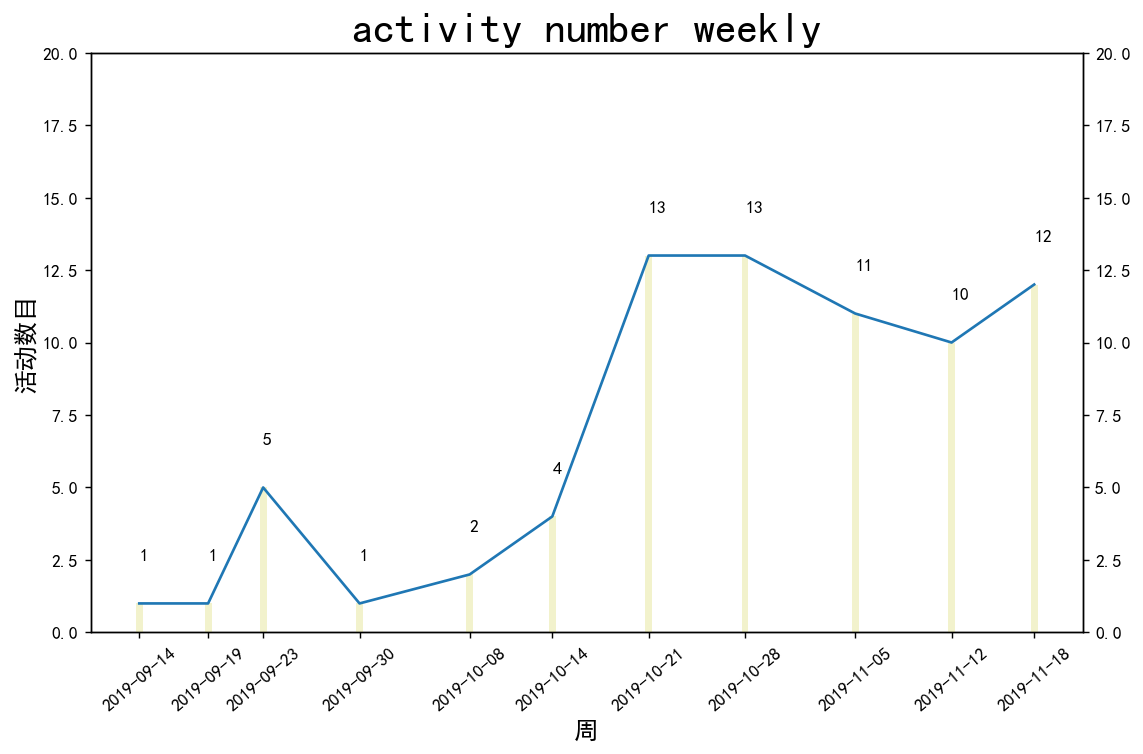

In [14]:
fig=plt.figure(dpi=128,figsize=(10,6))
plt.title("activity number weekly",fontsize=24)
plt.xlabel("周",fontsize=14)#设置轴的名称
plt.ylabel("活动数目",fontsize=14)
plt.ylim(0,20)#设置y值界限
plt.xticks(rotation=40)# x轴标签竖直

#text()添加数据标签
for x,y in zip(data_day,data_num):
    plt.text(x,y+1.5,'%.0f'%y)

#绘制柱形图
plt2 = plt.twinx()  # 组合图
plt2.bar(data_day,data_num , alpha=0.2, width=0.5,color='y')
plt2.set_ylim(0,20)

#自定义刻度和刻度标签
plt2.set_xticks(data_day)
plt2.set_xticklabels(data_day)

plt.plot(data_day,data_num)